# Logistic Regression
This Notebook presents tests to tune hyperparameters for logistic regression and present results obtained during training.

In [1]:
import sys
sys.path.append('../src')
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from movies_preprocessing import full_processing
from dataset_split import train_test_split_perso
from evaluation import get_n_accuracies_test

In [2]:
df = pd.read_csv('../data/training.csv')
features = ["year_film", "genres", "averageRating", "dir_won_before", "budget", "nb_actor_won_before","won_bafta","won_gg_drama","won_gg_comedy", "runtimeMinutes"]
X = df[features]
X_processed = full_processing(X, "median")
y = df['winner']

X_train, X_test, y_train, y_test = train_test_split_perso(df, X_processed, y, 0.2)

/Users/emile/Desktop/MLProject/Notebooks/../src/movies_preprocessing.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["genres_list"] = df["genres"].str.split(",")


## Baseline Model

We start with a model with default parameters to get a baseline model and results to start with.

In [9]:
log_reg_raw = LogisticRegression(max_iter=1000, class_weight='balanced', solver = 'liblinear')
log_reg_raw.fit(X_train, y_train)

top1, top3 = get_n_accuracies_test(log_reg_raw, df, X_processed, y, 1000)
print("Top-1 accuracy for baseline model :", np.mean(top1))
print("Top-3 accuracy for baseline model :", np.mean(top3))

Top-1 accuracy for baseline model : 0.5063529411764706
Top-3 accuracy for baseline model : 0.8502352941176471


For a 1000 runs of this model on random train-validation splits we get an average top-3 score accuracy of 83% and an average top-1 score of 48%. These results are quite encouraging but without any regularization the model might overfit the training set data. In the next sections we will try to upgrade the model and to make it more robust through feature selection, regularization and hyper parameters tuning.

## Hyper parameters Tuning 

In logistic regression we can choose two hyper parameters, the type of penalty L1 (Lasso) or L2 (Ridge) we can also combine both with the Elastic Net regularization. In our case L1 showed poor results compared to L2 and caused the model to not converge on some data splits. So we can stick to L2 penalty and we have to tune the regularization strength to find an optimal value. On the plot below, see Fig. 7, we can see both top-1 and top-3 accuracies for different value of C, the inverse of the regularization strength. The error bars also display the standard deviation, giving us an idea of the variance for each model.

[0.8294117647058823, 0.855294117647059, 0.8535294117647056, 0.8452941176470589, 0.8376470588235293, 0.8329411764705881]
[0.44470588235294106, 0.49823529411764694, 0.4988235294117647, 0.4964705882352941, 0.49882352941176467, 0.47294117647058825]


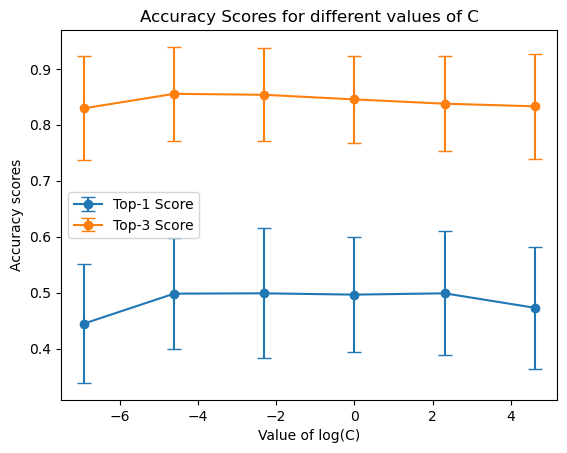

In [12]:
top1_scores_mean = []
top3_scores_mean = []
top1_scores_std = []
top3_scores_std = []
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
for c in Cs:
    log_reg_c = LogisticRegression(penalty='l2', C = c, max_iter=1000, solver='liblinear', class_weight='balanced')
    top1, top3 = get_n_accuracies_test(log_reg_c, df, X_processed, y, 100)
    top1_scores_mean.append(np.mean(top1))
    top3_scores_mean.append(np.mean(top3))
    top1_scores_std.append(np.std(top1))
    top3_scores_std.append(np.std(top3))

print(top3_scores_mean)
print(top1_scores_mean)
plt.errorbar(np.log(Cs), top1_scores_mean, yerr=top1_scores_std, fmt='-o', capsize=5, label="Top-1 Score")
plt.errorbar(np.log(Cs), top3_scores_mean, yerr=top3_scores_std, fmt='-o', capsize=5, label="Top-3 Score")


plt.xlabel("Value of log(C)")
plt.ylabel("Accuracy scores")
plt.title("Accuracy Scores for different values of C")
plt.legend()
plt.show()
plt.close()